# Feature Engineering

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
train = pd.read_csv('Dataset/Admission_Predict_Ver1.1.csv')
test = pd.read_csv('Dataset/Admission_Predict.csv')

In [4]:
#Function to choose highly correlated columns

def get_correlated(cor):
    correlated =set()
    for i in cor.columns:
        for j in cor.columns:
            if cor[i][j]>0.8  and i!=j:
                correlated.add(i)
                correlated.add(j)
    print("The Correlated columns: {}".format(list(correlated)))
    return correlated

### Check for missing values

In [5]:
train.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
test.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**Observations:**
- The good news is that we don't have any missing values so now we can exclude handling missing values step which is one another important step in feature engineering.

**As we are having a lot of numerical features it's our main job to find out the highly correlated features.**

In [7]:
corr = get_correlated(train.corr())

The Correlated columns: ['Chance of Admit ', 'TOEFL Score', 'GRE Score', 'CGPA']


<AxesSubplot:>

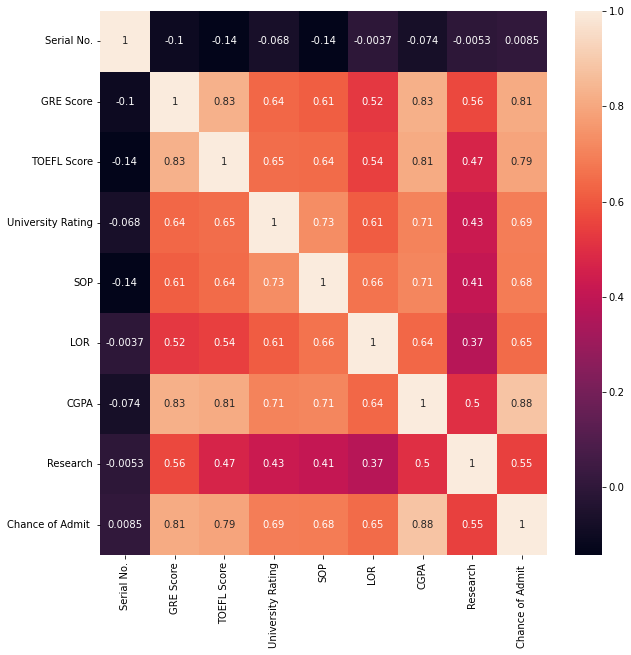

In [8]:
plt.figure(figsize =(10,10))
sns.heatmap(train.corr(),annot= True,cmap = 'rocket')

#### Now job is very simple:

- Only take the highly correlated features.
- Perform Scaling and Normalization
- Create models
- Perform Cross Validation
- Perform Hyperparameter tuning

In [9]:
data = train[corr]
test_data = test[corr]

/tmp/ipykernel_3562/3793639419.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data = train[corr]
/tmp/ipykernel_3562/3793639419.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  test_data = test[corr]


### Outlier Detection using Z-Score method:

In [10]:
def outlier(data):
    out1=[]
    for col in data.columns:
        outliers =[]
        mean = data[col].mean()
        std = data[col].std()
        for i in data[col]:
                z = (i - mean)/std
                if z>2:
                    outliers.append(i)
        out1.append(list(outliers))
        print("There are {} outliers in {} feature".format(len(outliers),col))
    return out1

In [11]:
out = outlier(data)

There are 0 outliers in Chance of Admit  feature
There are 9 outliers in TOEFL Score feature
There are 9 outliers in GRE Score feature
There are 9 outliers in CGPA feature


- To Delete the ouliers I will first replace all the outliers values with np.nan and will delete them using dropna method



In [12]:
j =0
columns =data.columns
for i in out:
    for val in data[columns[j]]:
        if val in i:
            data[columns[j]]= data[columns[j]].replace(val,np.nan)
    j =j+1

/tmp/ipykernel_3562/1191060815.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns[j]]= data[columns[j]].replace(val,np.nan)


In [13]:
data.isnull().sum()

Chance of Admit     0
TOEFL Score         9
GRE Score           9
CGPA                9
dtype: int64

In [14]:
data.dropna(axis=0, inplace=True)

/tmp/ipykernel_3562/2505677585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0, inplace=True)


### Dividing the data into dependent and independent features

In [16]:
y = data['Chance of Admit ']
t_test = test_data['Chance of Admit ']
data.drop(['Chance of Admit '], axis=1, inplace=True)
test_data.drop(['Chance of Admit '], axis=1, inplace=True)

/tmp/ipykernel_3562/1025164726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Chance of Admit '], axis=1, inplace=True)
/tmp/ipykernel_3562/1025164726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['Chance of Admit '], axis=1, inplace=True)


### Performing Standardization

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_ss = ss.fit_transform(data)
ss1 = StandardScaler()
test_ss = ss.fit_transform(test_data)

# Modeling

In [19]:
# try different machine learning models

from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.svm import SVR
from sklearn.linear_model import Ridge as RR
from sklearn.metrics import r2_score

In [20]:
key = ['Linear Regression', 'Decision Tree Regresssion', 'Random Forest Regression', 'Gradient Boosting Regression', 'Ada Boosting Regression', 'K-Neighbors Regression','Support Vector Regression', 'Lasso Regression']
value = [LR(), DTR(), RFR(), GBR(), ABR(), KNR(), SVR(), RR()]
pred = []
models = dict(zip(key, value))
print(models)

{'Linear Regression': LinearRegression(), 'Decision Tree Regresssion': DecisionTreeRegressor(), 'Random Forest Regression': RandomForestRegressor(), 'Gradient Boosting Regression': GradientBoostingRegressor(), 'Ada Boosting Regression': AdaBoostRegressor(), 'K-Neighbors Regression': KNeighborsRegressor(), 'Support Vector Regression': SVR(), 'Lasso Regression': Ridge()}


In [21]:
for name ,algo in models.items():
    model=algo
    model.fit(data_ss, y)
    predictions= model.predict(test_ss)
    acc = r2_score(t_test, predictions)
    pred.append(acc)
    print(name, acc)

Linear Regression 0.7775488156748747
Decision Tree Regresssion 0.5506080313448634
Random Forest Regression 0.7605764290197423
Gradient Boosting Regression 0.7901648306969269
Ada Boosting Regression 0.697066406848785
K-Neighbors Regression 0.8234699766384941
Support Vector Regression 0.7037601282165615
Lasso Regression 0.777484913312139


### Plotting the accuracy of each model

<AxesSubplot:>

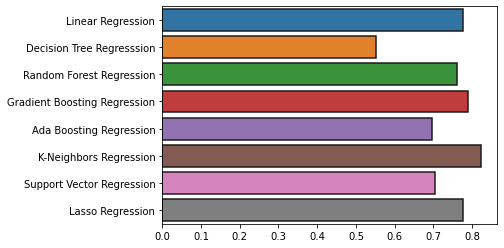

In [22]:
sns.barplot(y=key,x=pred,linewidth=1.5,orient ='h',edgecolor="0.1")

**Without any hyper parameter tuning we found that KNN Algorithm is good in terms of accuracy. let's Perform Hyper Parameter Tuning on it**

In [24]:
n_neighbors = list(np.arange(1,6))
weights = ['uniform','distance']
algorithm = ['auto','ball_tree','kd_tree','brute']
metric =['euclidean','manhattan','chebyshev','minkowski']
p =[1,2]
leaf_size = list(np.arange(20,200,40))
random_grid = {'n_neighbors':n_neighbors,'weights':weights,'p':p,'leaf_size':leaf_size,'algorithm':algorithm,'metric':metric}
print(random_grid)

{'n_neighbors': [1, 2, 3, 4, 5], 'weights': ['uniform', 'distance'], 'p': [1, 2], 'leaf_size': [20, 60, 100, 140, 180], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}


In [25]:
from sklearn.model_selection import RandomizedSearchCV
rf = KNR()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(data_ss, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END algorithm=ball_tree, leaf_size=60, metric=chebyshev, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=60, metric=chebyshev, n_neighbors=4, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=60, metric=chebyshev, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=chebyshev, n_neighbors=4, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=100, metric=minkowski, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=140, metric=euclidean, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=60, metric=manhattan, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [20, 60, 100, 140, 180],
                                        'metric': ['euclidean', 'manhattan',
                                                   'chebyshev', 'minkowski'],
                                        'n_neighbors': [1, 2, 3, 4, 5],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, verbose=2)

In [26]:
rf_random.best_estimator_

KNeighborsRegressor(algorithm='kd_tree', leaf_size=100, metric='chebyshev')

In [27]:
final = KNR(algorithm='kd_tree', leaf_size=60, metric='chebyshev',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                    weights='distance')
final.fit(data_ss,y)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=60, metric='chebyshev', p=1,
                    weights='distance')

### Evaluating the effect of Hyper Parameter Optimization

In [29]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [30]:
base_model = KNR()
base_model.fit(data_ss, y)
base_accuracy = evaluate(base_model, test_ss, t_test)

Model Performance
Average Error: 0.0452 degrees.
Accuracy = 93.01%.


In [32]:
best_model = final
best_accuracy = evaluate(best_model, test_ss, t_test)

Model Performance
Average Error: 0.0396 degrees.
Accuracy = 94.00%.


In [33]:
print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

Improvement of 1.07%.


In [34]:
final = best_model
pred = final.predict(test_ss)
pred[:20]

array([0.93860621, 0.79536868, 0.65740999, 0.77039567, 0.61618068,
       0.85410423, 0.72008814, 0.60708776, 0.53521815, 0.68463619,
       0.65802767, 0.81319711, 0.80858277, 0.60008327, 0.6794249 ,
       0.5903761 , 0.68384994, 0.67493543, 0.72032613, 0.62914228])

/home/amar/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/amar/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Prediction level')

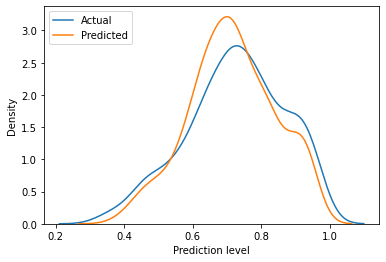

[CV] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=100, metric=chebyshev, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=100, metric=manhattan, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=140, metric=minkowski, n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, metric=chebyshev, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=140, metric=minkowski, n_neighbors=4, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=140, metric=euclidean, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=140, metric=euclidean, n_nei

In [35]:
sns.distplot(t_test,hist=False,label = 'Actual')
sns.distplot(pred,hist=False, label ='Predicted')
plt.legend(loc="upper left")
plt.xlabel('Prediction level')